# 13장 엑셀

### 13.1 엑셀 파일의 데이터 읽기

#### 엑셀 파일의 데이터 읽기

pandas로 엑셀 파일 데이터 읽기   
df=pd.read_excel('excel_file.xlsx'[,sheet_name=number 혹은 '시트이름'],index_col=number 혹은 '열이름')

In [19]:
import pandas as pd
df= pd.read_excel('C:/myPyCode/data/학생시험성적.xlsx')
df

,학생,국어,영어,수학,평균
0,A,80,90,85,85.000000
1,B,90,95,95,93.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333
4,E,75,90,85,83.333333


두번째 시트 불러오기

In [3]:
pd.read_excel('C:/myPyCode/data/학생시험성적.xlsx', sheet_name = 1)

,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


In [4]:
pd.read_excel('C:/myPyCode/data/학생시험성적.xlsx', sheet_name = '2차시험')

,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


인덱스 지정하기

In [6]:
df= pd.read_excel('C:/myPyCode/data/학생시험성적.xlsx', sheet_name=1, index_col='학생')
df

,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


엑셀 파일로 쓸 객체를 생성

In [93]:
import pandas as pd

excel_exam_data1 = {'학생': ['A', 'B', 'C', 'D', 'E', 'F'],
                    '국어': [80, 90, 95, 70, 75, 85],
                    '영어': [90, 95, 70, 85, 90, 95],
                    '수학': [85, 95, 75, 80, 85, 100]}
df1 = pd.DataFrame(excel_exam_data1, columns=['학생','국어', '영어', '수학'])
df1

,학생,국어,영어,수학
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85
5,F,85,95,100


데이터를 쓸 엑셀 시트 쓰기

In [29]:
excel_writer = pd.ExcelWriter('C:/myPyCode/data/학생시험성적2.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer, index=False)
excel_writer.save()

시트 이름을 지정하여 저장하기

In [30]:
excel_writer2 = pd.ExcelWriter('C:/myPyCode/data/학생시험성적3.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer2, index=False, sheet_name='중간고사')
excel_writer2.save()

하나의 엑셀에 두 개의 시트 생성하기

In [91]:
import pandas as pd

excel_exam_data2 = {'학생': ['A', 'B', 'C', 'D', 'E', 'F'],
                    '국어': [85, 95, 75, 80, 85, 100],
                    '영어': [80, 90, 95, 70, 75, 85 ],
                    '수학': [90, 95, 70, 85, 90, 95]}
df2 = pd.DataFrame(excel_exam_data2, columns=['학생', '국어', '영어', '수학'])
df2

,학생,국어,영어,수학
0,A,85,80,90
1,B,95,90,95
2,C,75,95,70
3,D,80,70,85
4,E,85,75,90
5,F,100,85,95


In [97]:
excel_writer3= pd.ExcelWriter('C:/myPyCOde/data/학생시험성적4.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer3, index=False, sheet_name='중간고사')
df2.to_excel(excel_writer3, index=False, sheet_name='기말고사')
excel_writer3.save()

### 13.2 엑셀 파일 통합하기

#### 효율적인 데이터 처리를 위한 엑셀 데이터 구조

#### 여러 개의 엑셀 파일 데이터 통합하기

여러개의 엑셀 파일을 저장하기

In [1]:
excel_data_files = ['C:/myPyCode/data/담당자별_판매량_Andy사원.xlsx',
                    'C:/myPyCode/data/담당자별_판매량_Becky사원.xlsx',
                    'C:/myPyCode/data/담당자별_판매량_Chris사원.xlsx']

데이터를 통합하기 위해 DataFrame형태로 변수 생성

In [3]:
import pandas as pd
total_data = pd.DataFrame()

한번에 출력하기

In [27]:
import pandas as pd

for f in excel_data_files:
    df=pd.read_excel(f)
    total_data = total_data.append(df)
    
total_data

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7060\2863258560.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = total_data.append(df)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_7060\2863258560.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = total_data.append(df)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_7060\2863258560.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = total_data.append(df)


,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
0,시계,B,나,154,108,155,114
1,구두,B,나,200,223,213,202
2,핸드백,B,나,350,340,377,392
0,시계,C,다,168,102,149,174
1,구두,C,다,231,279,277,292
2,핸드백,C,다,365,383,308,323


파일 index를 수정하기

In [4]:
import pandas as pd

for f in excel_data_files:
    df=pd.read_excel(f)
    total_data = total_data.append(df, ignore_index=True) #ignore 무시하고 집어넣고 싶을 때
    
total_data

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10724\4099798401.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = total_data.append(df, ignore_index=True) #ignore 무시하고 집어넣고 싶을 때
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10724\4099798401.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = total_data.append(df, ignore_index=True) #ignore 무시하고 집어넣고 싶을 때
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10724\4099798401.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = total_data.append(df, ignore_index=True) #ignore 무시하고 집어넣고 싶을 때


,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


많은 파일을 통합할 때 내장모듈 glob 함수 사용

* = 모든, ? = 한글자

In [9]:
import glob #내장 모듈이기 때문에 별도로 import

glob.glob('C:/myPyCode/data/담당자별_판매량_*사원.xlsx')

['C:/myPyCode/data\\담당자별_판매량_Andy사원.xlsx',
 'C:/myPyCode/data\\담당자별_판매량_Becky사원.xlsx',
 'C:/myPyCode/data\\담당자별_판매량_Chris사원.xlsx']

In [10]:
import glob
import pandas as pd

excel_data_files1 = glob.glob('C:/myPyCode/data/담당자별_판매량_*사원.xlsx')
total_data1 = pd.DataFrame()

for f in excel_data_files1:
    df = pd.read_excel(f)
    total_data1 = total_data1.append(df, ignore_index=True)
    
total_data1

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10724\358041970.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data1 = total_data1.append(df, ignore_index=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10724\358041970.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data1 = total_data1.append(df, ignore_index=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10724\358041970.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data1 = total_data1.append(df, ignore_index=True)


,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


### 통합 결과를 엑셀 파일로 저장하기

In [12]:
import glob
import pandas as pd

excel_file_name ='C:/myPyCode/data/담당자별_판매량_통합.xlsx' #파일명 지정해줘야 해
excel_total_file_writer = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
total_data1.to_excel(excel_total_file_writer, index=False, sheet_name='담당자별_판매량')
excel_total_file_writer.save()

glob.glob(excel_file_name)

['C:/myPyCode/data/담당자별_판매량_통합.xlsx']

## 13.3 엑셀 파일로 읽어온 데이터 다루기

### 데이터를 추가하고 변경하기

In [13]:
import pandas as pd
df= pd.read_excel('C:/myPyCode/data/담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


loc을 이용하여 값을 변경하기

df.loc[index_name, column_name] = value

In [16]:
df.loc[2, '4분기'] = 0
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,0


loc을 이용하여 행을 추가하기

In [17]:
df.loc[3, '제품명'] = '벨트'
df.loc[3, '담당자'] = 'A'
df.loc[3, '지역'] = '가'
df.loc[3, '1분기'] = 100
df.loc[3, '2분기'] = 150
df.loc[3, '3분기'] = 200
df.loc[3, '4분기'] = 250

df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198.0,123.0,120.0,137.0
1,구두,A,가,273.0,241.0,296.0,217.0
2,핸드백,A,가,385.0,316.0,355.0,0.0
3,벨트,A,가,100.0,150.0,200.0,250.0


특정열의 데이터 전체 변경   
df[column_name]= value

In [19]:
df['담당자'] = 'Andy'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,Andy,가,198.0,123.0,120.0,137.0
1,구두,Andy,가,273.0,241.0,296.0,217.0
2,핸드백,Andy,가,385.0,316.0,355.0,0.0
3,벨트,Andy,가,100.0,150.0,200.0,250.0


새로운 이름으로 저장하기

In [20]:
excel_file_name = 'C:/myPyCode/data/담당자별_판매량_Andy사원_new.xlsx' #덮어쓰기 싫으면 파일 이름 새로운 거로

new_excel_file= pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
df.to_excel(new_excel_file, index=False)
new_excel_file.save()

glob.glob(excel_file_name)

['C:/myPyCode/data/담당자별_판매량_Andy사원_new.xlsx']

### 여러 개의 엑셀 파일에서 데이터 수정하기

import re #문자열에서 어떤 패턴을 찾아내면 편하겠다  
re.sub(pattern, repl, string)  
string에서 pattern을 찾아  repl로 교체

In [22]:
import re

file_name = 'C:/myPyCode/data/담당자별 _판매량_Andy사원.xlsx'

new_file_name = re.sub('.xlsx', '2.xlsx', file_name)
new_file_name

'C:/myPyCode/data/담당자별 _판매량_Andy사원2.xlsx'

In [4]:
import glob
import re
import pandas as pd

#원하는 문자열이 포함된 파일을 검색해 리스트를 할당한다
excel_data_files1 = glob.glob('C:/myPyCode/data/담당자별_판매량_*사원.xlsx')

#리스트에 있는 엑셀 파일만큼 반복한다
for f in excel_data_files1:
    #엑셀 파일에서 DataFrame 형식으로 데이터 가져온다
    df = pd.read_excel(f)
    
    #특정 열의 값을 변경한다
    if(df.loc[1,'담당자']) == 'A':
        df['담당자'] = 'Andy'        
    elif(df.loc[1,'담당자']) == 'B':
        df['담당자'] = 'Becky'
    elif(df.loc[1,'담당자']) == 'C':
        df['담당자'] = 'Chris'
        
    #엑셀 파일 이름에서 지정된 문자열 패턴을 찾아 파일명을 변경한다
    f_new = re.sub('.xlsx', '20.xlsx', f)
    print(f_new)
    
    #수정된 데이터를 새로운 이름의 엑셀 파일로 저장한다
    new_excel_file = pd.ExcelWriter(f_new, engine='xlsxwriter')
    df.to_excel(new_excel_file, index=False)
    new_excel_file.save()

C:/myPyCode/data\담당자별_판매량_Andy사원20.xlsx
C:/myPyCode/data\담당자별_판매량_Becky사원20.xlsx
C:/myPyCode/data\담당자별_판매량_Chris사원20.xlsx


In [3]:
glob.glob('C:/myPyCode/data/담당자별_판매량_*사원??.xlsx')

['C:/myPyCode/data\\담당자별_판매량_Andy사원20.xlsx',
 'C:/myPyCode/data\\담당자별_판매량_Becky사원20.xlsx',
 'C:/myPyCode/data\\담당자별_판매량_Chris사원20.xlsx']

### 엑셀의 필터 기능 수행하기

엑셀의 필터 기능을 이용하여 특정 부분만 선별하여 보기

In [8]:
import pandas as pd

df = pd.read_excel('C:/myPyCode/data/담당자별_판매량_통합.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [11]:
df['제품명']

0     시계
1     구두
2    핸드백
3     시계
4     구두
5    핸드백
6     시계
7     구두
8    핸드백
Name: 제품명, dtype: object

비교 연산자로 '핸드백'이 있는 문자열이 있는지 검사

In [15]:
df['제품명'] == '핸드백'

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: 제품명, dtype: bool

해당 결과를 df안에 넣으면 True에 해당하는 열만 출력할 수 있다

In [17]:
handbag = df[df['제품명'] == '핸드백']
handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


isin을 이용하여 출력하기   
DataFrame_data.isin(values)

In [33]:
import pandas as pd

df = pd.read_excel('C:/myPyCode/data/담당자별_판매량_통합.xlsx')
handbag1 = df[df['제품명'].isin(['핸드백'])]
handbag1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


*pandas에서
논리곱(and) = &
논리합(or) = |
논리부정(not) = ~

In [34]:
df[(df['제품명']=='구두') | (df['제품명']=='핸드백')]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [35]:
df[df['제품명'].isin(['구두', '핸드백'])]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


### 조건을 설정해 원하는 행만 지정하기

In [37]:
df[(df['3분기'] >= 250)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [40]:
df[(df['제품명']=='핸드백') & (df['3분기'] >= 350)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392


### 원하는 열만 선택하기

In [41]:
df[['제품명', '1분기', '2분기', '3분기', '4분기']]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331
3,시계,154,108,155,114
4,구두,200,223,213,202
5,핸드백,350,340,377,392
6,시계,168,102,149,174
7,구두,231,279,277,292
8,핸드백,365,383,308,323


행과 열의 위치로 원하는 

DataFrame_data.iloc[row_num, col_num]   
( ':'를 입력하면 행이나 열 전체 선택)

In [42]:
df.iloc[:,[0,3,4,5,6,]]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331
3,시계,154,108,155,114
4,구두,200,223,213,202
5,핸드백,350,340,377,392
6,시계,168,102,149,174
7,구두,231,279,277,292
8,핸드백,365,383,308,323


In [43]:
df.iloc[[0,2],:]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
2,핸드백,A,가,385,316,355,331


### 엑셀 데이터 계산하기

In [45]:
import pandas as pd

df = pd.read_excel('C:/myPyCode/data/담당자별_판매량_통합.xlsx')

handbag = df[(df['제품명'] =='핸드백')]
handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


DataFrame_data.sum([axis =0(기본) or 1])

0 = 열 방향 / 1= 행방향

In [46]:
handbag.sum(axis = 0)

제품명    핸드백핸드백핸드백
담당자          ABC
지역           가나다
1분기         1100
2분기         1039
3분기         1040
4분기         1046
dtype: object

In [47]:
handbag.sum(axis = 1)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5956\3823644856.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  handbag.sum(axis = 1)


2    1387
5    1459
8    1379
dtype: int64

헤더가 '연간판매량'인 DataFrame 데이터 생성

In [49]:
handbag_sum = pd.DataFrame(handbag.sum(axis = 1), columns =['연간판매량'])
handbag_sum

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5956\2838895087.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  handbag_sum = pd.DataFrame(handbag.sum(axis = 1), columns =['연간판매량'])


,연간판매량
2,1387
5,1459
8,1379


join을 이용해 데이터 통합하여 보여주기

In [50]:
handbag_total = handbag.join(handbag_sum)
handbag_total

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379


오름차순으로 보여주기

sort_values(by[,axis=0(기본) or 1, asending = True(기본) or False])   
뭐를 기준으로 어떻게 정렬

In [54]:
handbag_total.sort_values(by='연간판매량', ascending=True)

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
8,핸드백,C,다,365,383,308,323,1379
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459


In [55]:
handbag_total.sort_values(by='연간판매량', ascending=False)

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
5,핸드백,B,나,350,340,377,392,1459
2,핸드백,A,가,385,316,355,331,1387
8,핸드백,C,다,365,383,308,323,1379


#### 열 데이터의 합계 구하기

sum()을 이용한다

In [57]:
handbag_total.sum() #문자열은 합쳐져

제품명      핸드백핸드백핸드백
담당자            ABC
지역             가나다
1분기           1100
2분기           1039
3분기           1040
4분기           1046
연간판매량         4225
dtype: object

In [60]:
handbag_sum2 = pd.DataFrame(handbag_total.sum(), columns=['합계'])
handbag_sum2

,합계
제품명,핸드백핸드백핸드백
담당자,ABC
지역,가나다
1분기,1100
2분기,1039
3분기,1040
4분기,1046
연간판매량,4225


#행과 열 바꾸기 (DataFrame_data.T)

In [65]:
handbag_total2 = handbag_total.append(handbag_sum2.T)
handbag_total2

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5956\2323127094.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  handbag_total2 = handbag_total.append(handbag_sum2.T)


,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백핸드백핸드백,ABC,가나다,1100,1039,1040,1046,4225


필요없는 문자열 제거하기

In [66]:
handbag_total2.loc['합계', '제품명'] ='핸드백'
handbag_total2.loc['합계', '담당자'] = '전체'
handbag_total2.loc['합계', '지역']= '전체'
handbag_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백,전체,전체,1100,1039,1040,1046,4225


In [70]:
import pandas as pd

df = pd.read_excel('C:/myPyCode/data/담당자별_판매량_통합.xlsx')

product_name ='핸드백'
handbag = df[(df['제품명'] == product_name)]

handbag_sum = pd.DataFrame(handbag.sum(axis = 1), columns = ['연간판매량'])
handbag_total = handbag.join(handbag_sum)

handbag_sum2 = pd.DataFrame(handbag_total.sum(), columns = ['합계']) #sum(axis = 0으로 하면 열을 기준으로 합산하지만 보여줄 때 뒤집어)
handbag_total2 = handbag_total.append(handbag_sum2.T)

handbag_total2.loc['합계', '제품명'] = product_name
handbag_total2.loc['합계', '담당자'] = '전체'
handbag_total2.loc['합계', '지역'] = '전체'

handbag_total2

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5956\3522121368.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  handbag_sum = pd.DataFrame(handbag.sum(axis = 1), columns = ['연간판매량'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_5956\3522121368.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  handbag_total2 = handbag_total.append(handbag_sum2.T)


,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백,전체,전체,1100,1039,1040,1046,4225


### 그래프를 엑셀 파일에 넣기

matplotlib과 pandas를 이용해 그래프 만들기

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

sales=  {'시간': [9,10,11,12,13,14,15],
         '제품1': [10,15,12,11,12,14,13],
         '제품2': [9,11,14,12,13,10,12]}

df = pd.DataFrame(sales, index = sales['시간'], columns = ['제품1', '제품2'])
df.index.name = '시간' #index 라벨 추가

df

,제품1,제품2
시간,,
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


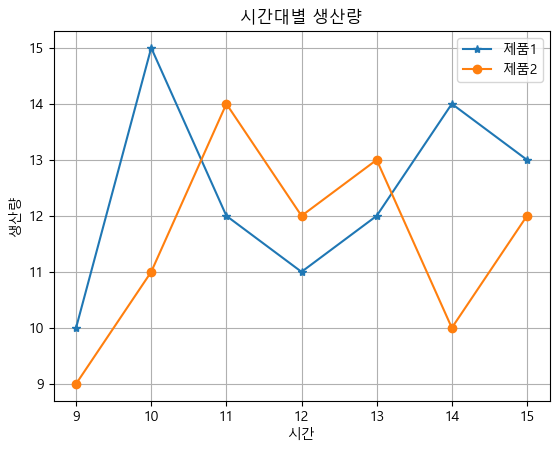

In [75]:
import matplotlib
import pandas as pd

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

product_plot = df.plot(grid = True, style = ['-*', '-o'], title='시간대별 생산량')
product_plot.set_ylabel('생산량')

image_file = 'C:/myPyCode/figures/fig_for_excel1.png'
plt.savefig(image_file, dpi = 400)

plt.show()

In [78]:
import pandas as pd

#pandas에서 ExcelWriter 객체 생성
excel_file ='C:/myPyCode/data/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

#DataFrame 데이터를 지정된 엑셀 시트에 쓰기
df.to_excel(excel_writer, index=True, sheet_name = 'Sheet1')

#ExcelWriter 객체에서 워크시트 객체 생성 #시트이름 같아야 해
worksheet = excel_writer.sheets['Sheet1']

#워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기
worksheet.insert_image('D2', image_file, {'x_scale':0.7, 'y_scale':0.7})

#ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_writer.save()

### 엑셀 차트 만들기

In [83]:
excel_chart = pd.ExcelWriter('C:/myPyCode/data/data_chart_in_excel.xlsx', engine = 'xlsxwriter')

df.to_excel(excel_chart, index = True, sheet_name = 'Sheet1')

workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

chart = workbook.add_chart({'type': 'line'})

chart.add_series({'values': '=Sheet1!$B$2:$B$8'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8'})

worksheet.insert_chart('D2', chart)

excel_chart.save()

x축과 y축의 값과 원하는 범례 지정

In [84]:
chart.add_series({"values": '=Sheet1!$B$2:$B$8',
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1'})  

chart.add_series({"values": '=Sheet1!$C$2:$C$8',
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1'})

In [82]:
chart.set_title({'name': '시간대별 생산량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '생산량'})

In [87]:
excel_chart = pd.ExcelWriter('C:/myPyCode/data/data_chart_in_excel2.xlsx', engine='xlsxwriter')

df.to_excel(excel_chart, index = True, sheet_name='Sheet1')

workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

chart = workbook.add_chart({'type': 'line'})

chart.add_series({"values": '=Sheet1!$B$2:$B$8',
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1'})

chart.add_series({"values": '=Sheet1!$C$2:$C$8',
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1'})
worksheet.insert_chart('D2',chart)

excel_chart.save()

In [90]:
excel_chart = pd.ExcelWriter('C:/myPyCode/data/data_chart_in_excel2.xlsx', engine='xlsxwriter')
print(excel_chart)

df.to_excel(excel_chart, index = True, sheet_name='Sheet1')

workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']
print(workbook)
print(worksheet)


chart = workbook.add_chart({'type': 'line'})
print(chart)

chart.add_series({"values": '=Sheet1!$B$2:$B$8',
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1'})

chart.add_series({"values": '=Sheet1!$C$2:$C$8',
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1'})

print(chart.add_series) #메서드

chart.set_title({'name': '시간대별 생산량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '생산량'})

worksheet.insert_chart('D2',chart)

excel_chart.save()

<bound method Chart.add_series of <xlsxwriter.chart_line.ChartLine object at 0x0000027DDC3BEFA0>>


#객체 클래스 개념 이해하기   

#ui